# OBJECT DETECTION

## Template Matching

### Full Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

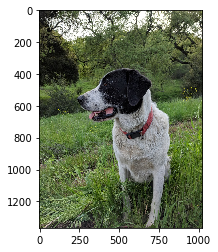

In [3]:
plt.imshow(full)

### Template Image

A subset of the image. Note how its actually the exact image. Later on we'll discuss more advanced methods for general matching, such as facial recognition.

In [4]:
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

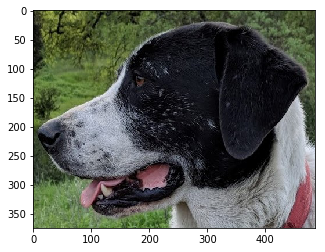

In [5]:
plt.imshow(face)

In [6]:
face.shape

(375, 486, 3)

In [7]:
full.shape

(1367, 1025, 3)

### Template Matching Methods

Make sure to watch the video for an explanation of the different methods!

**Quick Note on **eval()** function in case you haven't seen it before!**

In [8]:
sum([1,2,3])

6

In [9]:
mystring = 'sum'

In [10]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [11]:
myfunc = eval(mystring)

In [12]:
myfunc([1,2,3])

6

In [13]:
height, width, channels = face.shape

In [14]:
width

486

In [15]:
height

375

In [16]:
# The Full Image to Search
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [17]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)

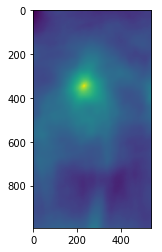

In [18]:
plt.imshow(res)

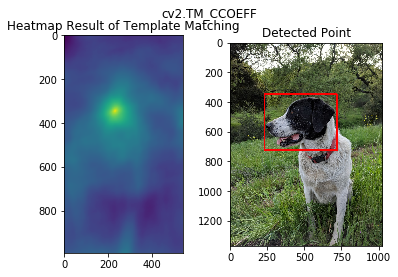

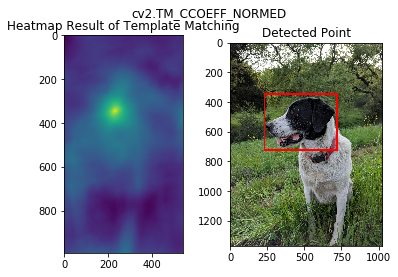

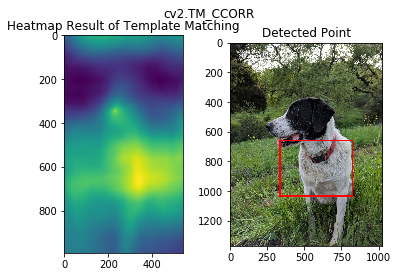

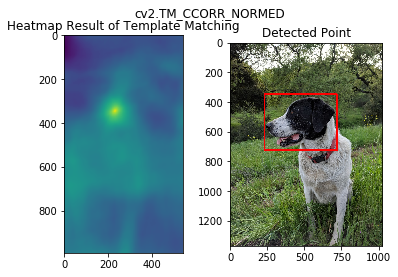

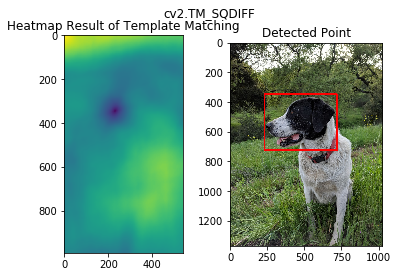

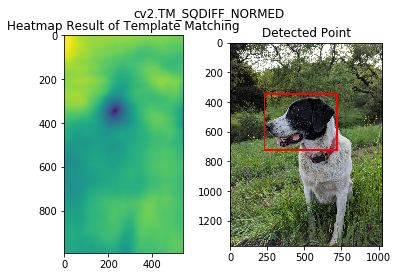

In [19]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    # (x, y)
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

----------

## Corner Detection

### The Image Data

In [20]:
import cv2 
import numpy as np  

import matplotlib.pyplot as plt
%matplotlib inline

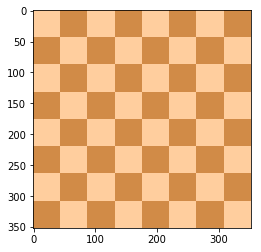

In [21]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

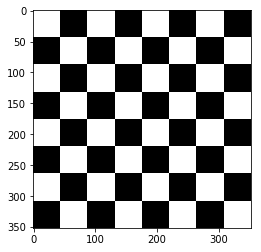

In [22]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

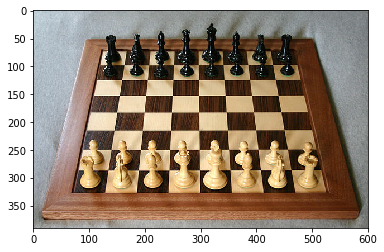

In [23]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

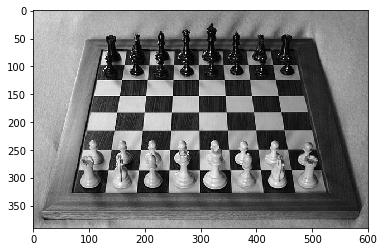

In [24]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

### Harris Corner Detection

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

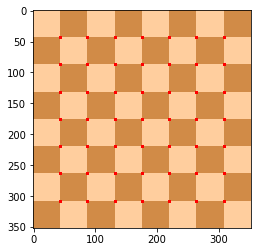

In [25]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

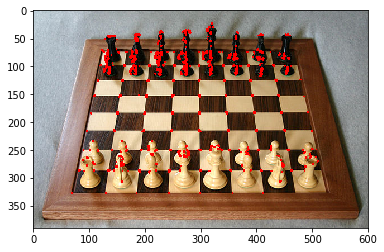

In [26]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)

### Shi-Tomasi Corner Detector & Good Features to Track Paper

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [27]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

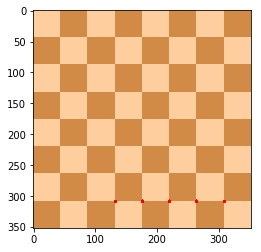

In [28]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

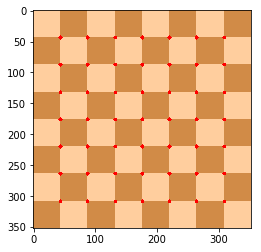

In [29]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

In [30]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

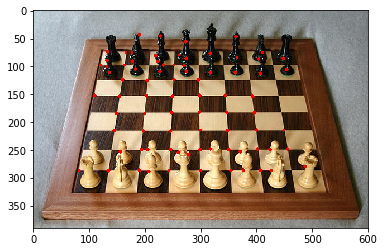

In [31]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)

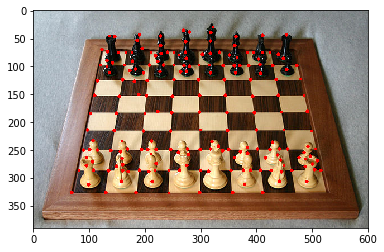

In [32]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,200,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)

--------------

## Edge Detection

### Canny Edge Detection
https://en.wikipedia.org/wiki/Canny_edge_detector

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
img = cv2.imread('DATA/sammy_face.jpg')

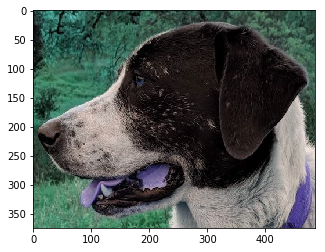

In [35]:
plt.imshow(img)

In [36]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

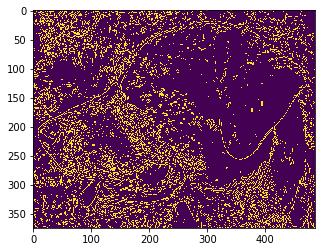

In [37]:
plt.imshow(edges)

In [38]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)

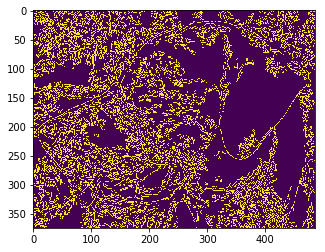

In [39]:
plt.imshow(edges)

### Choosing Thresholds

https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

In [40]:
# Calculate the median pixel value
med_val = np.median(img) 

In [41]:
med_val

64.0

In [42]:
# Lower bound is either 0 or 70% of the median value, whichever is higher
lower = int(max(0, 0.7* med_val))

In [43]:
# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

In [44]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)

In [45]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper+100)

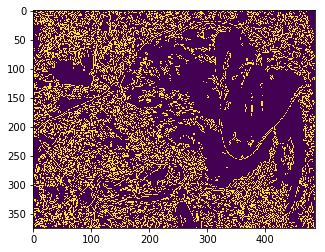

In [46]:
plt.imshow(edges)

In [47]:
upper 

83

Sometimes it helps to blur the images first, so we don't pick up minor edges.

In [48]:
blurred_img = cv2.blur(img,ksize=(5,5))

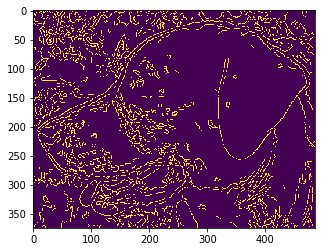

In [49]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

In [50]:
blurred_img = cv2.blur(img,ksize=(5,5))

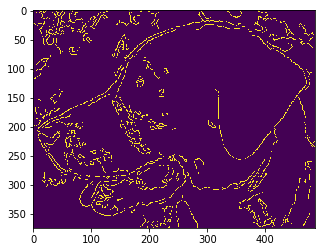

In [51]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)

In [52]:
lower

44

In [53]:
upper

83

Let's play around with these threshold values even further!
Often you'll need to experiment in regards to your specific dataset and what your final goal is.

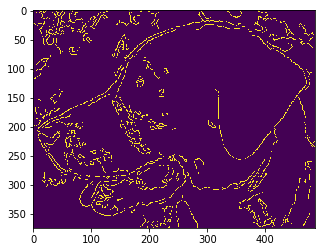

In [54]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)

---------

## Grid Detection

In [55]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')

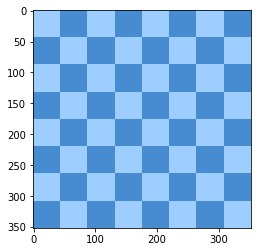

In [57]:
plt.imshow(flat_chess,cmap='gray')

In [58]:
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))

In [59]:
if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")

OpenCV was able to find the corners


In [60]:
corners.shape

(49, 1, 2)

In [61]:
flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy, (7, 7), corners, found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

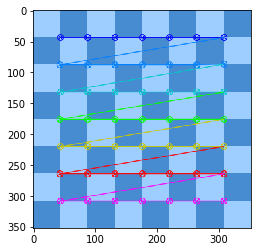

In [62]:
plt.imshow(flat_chess_copy)

### Circle Based Grids

In [63]:
dots = cv2.imread('DATA/dot_grid.png')

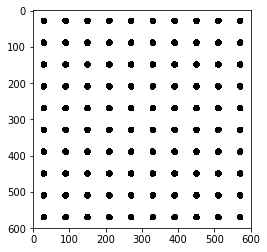

In [64]:
plt.imshow(dots)

In [65]:
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [66]:
found

True

In [67]:
corners

array([[[ 29.5,  29.5]],

       [[ 89.5,  29.5]],

       [[149.5,  29.5]],

       [[209.5,  29.5]],

       [[269.5,  29.5]],

       [[329.5,  29.5]],

       [[389.5,  29.5]],

       [[449.5,  29.5]],

       [[509.5,  29.5]],

       [[569.5,  29.5]],

       [[ 29.5,  89.5]],

       [[ 89.5,  89.5]],

       [[149.5,  89.5]],

       [[209.5,  89.5]],

       [[269.5,  89.5]],

       [[329.5,  89.5]],

       [[389.5,  89.5]],

       [[449.5,  89.5]],

       [[509.5,  89.5]],

       [[569.5,  89.5]],

       [[ 29.5, 149.5]],

       [[ 89.5, 149.5]],

       [[149.5, 149.5]],

       [[209.5, 149.5]],

       [[269.5, 149.5]],

       [[329.5, 149.5]],

       [[389.5, 149.5]],

       [[449.5, 149.5]],

       [[509.5, 149.5]],

       [[569.5, 149.5]],

       [[ 29.5, 209.5]],

       [[ 89.5, 209.5]],

       [[149.5, 209.5]],

       [[209.5, 209.5]],

       [[269.5, 209.5]],

       [[329.5, 209.5]],

       [[389.5, 209.5]],

       [[449.5, 209.5]],

       [[509

In [68]:
dbg_image_circles = dots.copy()
cv2.drawChessboardCorners(dbg_image_circles, (10, 10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

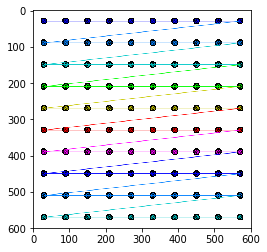

In [69]:
plt.imshow(dbg_image_circles)

Keep this in mind for later lectures on camera calibration! We've only scratched the surface here 

-------------

## Contour Detection

### External vs Internal Contours

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
img = cv2.imread('DATA/internal_external.png',0)

In [72]:
img.shape

(652, 1080)

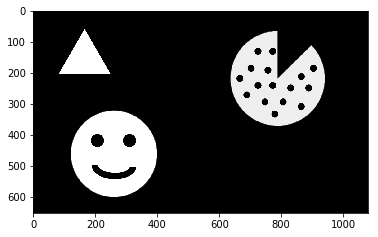

In [73]:
plt.imshow(img, cmap = 'gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [74]:
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [75]:
type(contours)

list

In [76]:
len(contours)

22

In [77]:
type(hierarchy)

numpy.ndarray

In [78]:
hierarchy.shape

(1, 22, 4)

In [79]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [80]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

In [81]:
contours

[array([[[247, 322]],
 
        [[246, 323]],
 
        [[240, 323]],
 
        [[239, 324]],
 
        [[233, 324]],
 
        [[232, 325]],
 
        [[229, 325]],
 
        [[228, 326]],
 
        [[225, 326]],
 
        [[224, 327]],
 
        [[221, 327]],
 
        [[220, 328]],
 
        [[218, 328]],
 
        [[217, 329]],
 
        [[215, 329]],
 
        [[214, 330]],
 
        [[213, 330]],
 
        [[212, 331]],
 
        [[210, 331]],
 
        [[209, 332]],
 
        [[207, 332]],
 
        [[206, 333]],
 
        [[205, 333]],
 
        [[204, 334]],
 
        [[203, 334]],
 
        [[202, 335]],
 
        [[201, 335]],
 
        [[200, 336]],
 
        [[198, 336]],
 
        [[197, 337]],
 
        [[196, 337]],
 
        [[195, 338]],
 
        [[194, 338]],
 
        [[192, 340]],
 
        [[191, 340]],
 
        [[190, 341]],
 
        [[189, 341]],
 
        [[187, 343]],
 
        [[186, 343]],
 
        [[185, 344]],
 
        [[184, 344]],
 
        [[182, 3

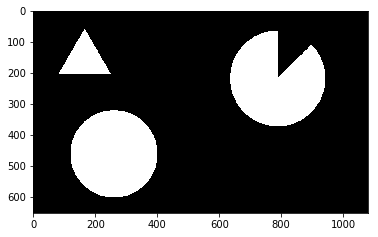

In [82]:
plt.imshow(external_contours,cmap='gray')

In [83]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

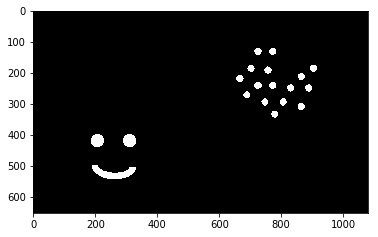

In [84]:
plt.imshow(image_internal,cmap='gray')

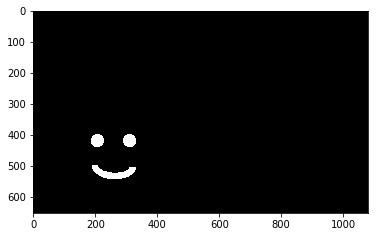

In [85]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] == 0:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
plt.imshow(image_internal,cmap='gray')        

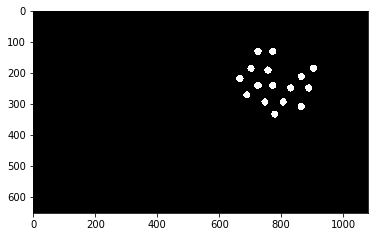

In [86]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] == 4:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
plt.imshow(image_internal,cmap='gray')        

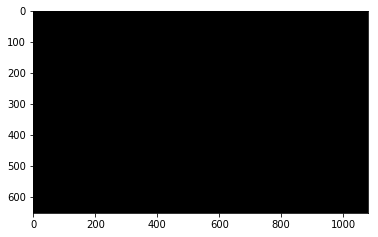

In [87]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] == 1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
plt.imshow(image_internal,cmap='gray')        

--------------

## Feature Matching

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [90]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)

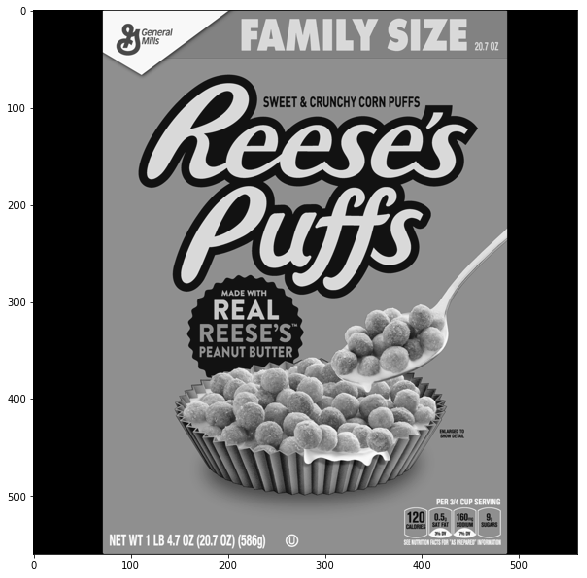

In [91]:
display(reeses)

In [92]:
cereals = cv2.imread('DATA/many_cereals.jpg',0) 

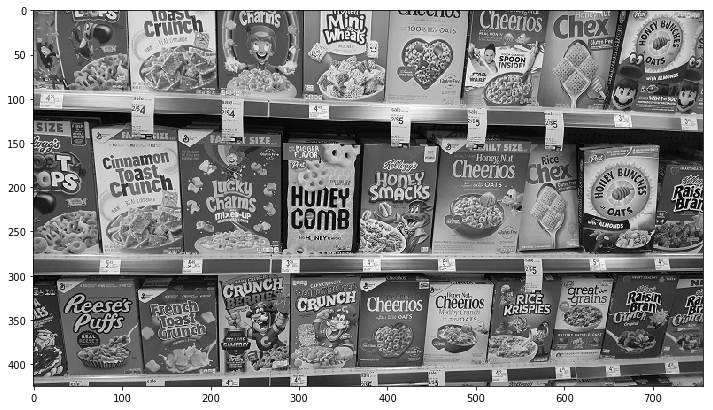

In [93]:
display(cereals)

### Brute Force Detection with ORB Descriptors

In [94]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

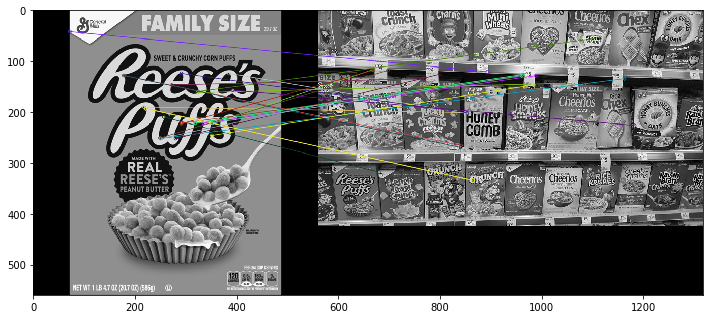

In [95]:
display(reeses_matches)

### Brute-Force Matching with SIFT Descriptors and Ratio Test

**SIFT (Scale Invariant Feature Transform)**

In [96]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

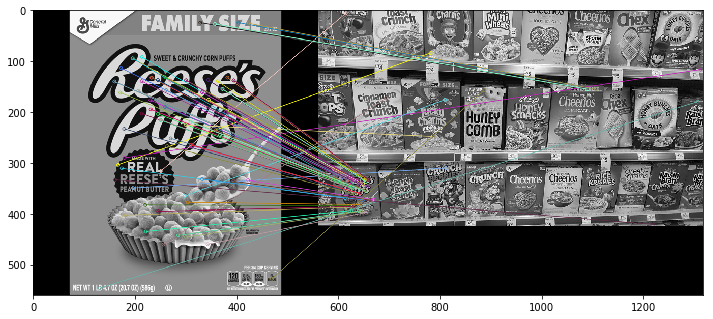

In [97]:
display(sift_matches)

### FLANN based Matcher

**FLANN (Fast Library for Approximate Nearest Neighbors)**

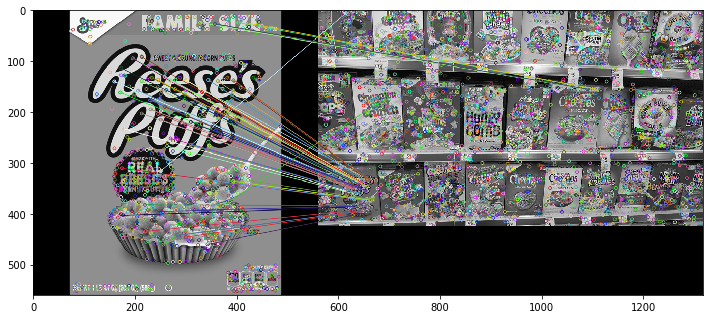

In [98]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

In [99]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

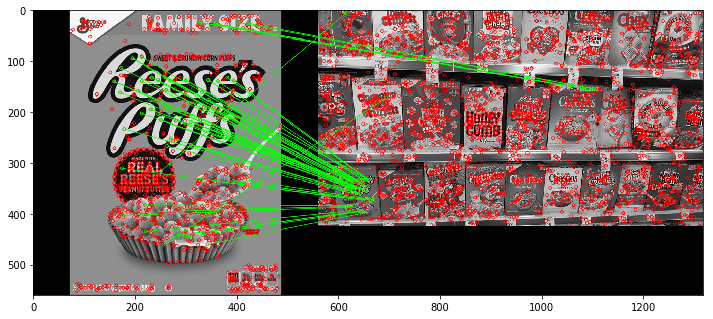

In [100]:
display(flann_matches)

-----------

## Image Segementation and the Watershed Algorithm

In [101]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

#### Our Task: Draw Contours Around the Coins

#### Common Coin Example

#### Naive Approach

Let's try to simply use a threshold and then use findContours.

##### Example Image

In [103]:
sep_coins = cv2.imread('DATA/pennies.jpg')

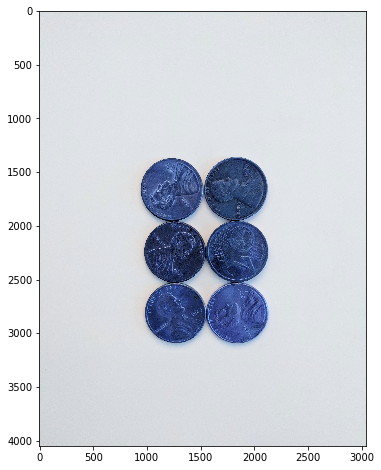

In [104]:
display(sep_coins)

### Apply Median Blurring

We have too much detail in this image, including light, the face edges on the coins, and too much detail in the background. Let's use Median Blur Filtering to blur the image a bit, which will be useful later on when we threshold.

In [105]:
sep_blur = cv2.medianBlur(sep_coins,25)

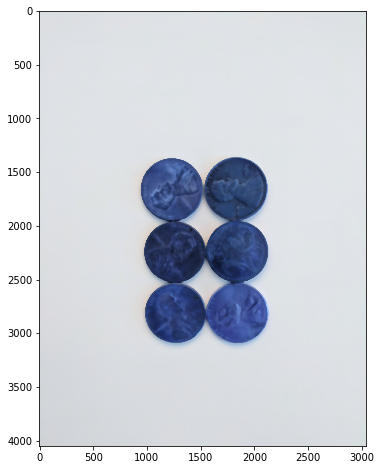

In [106]:
display(sep_blur)

In [107]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

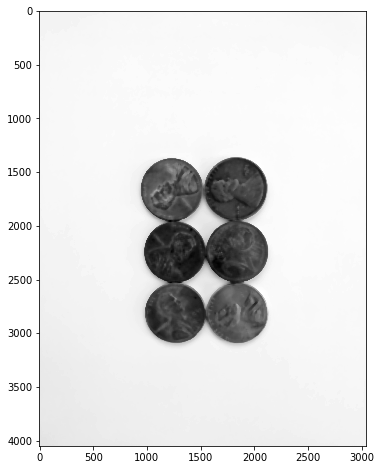

In [108]:
display(gray_sep_coins,cmap='gray')

### Binary Threshold

In [109]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

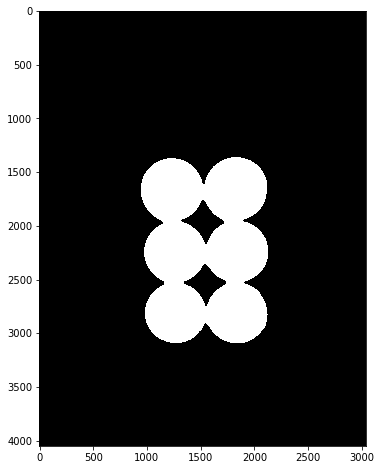

In [110]:
display(sep_thresh,cmap='gray')

### FindContours

In [111]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [112]:
# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

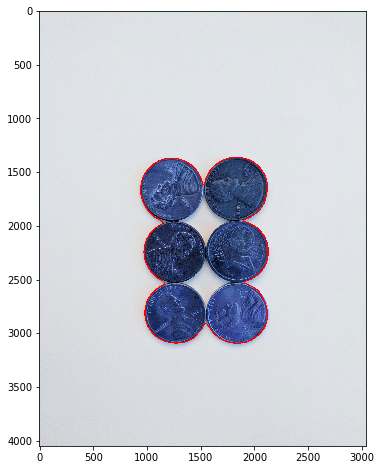

In [113]:
display(sep_coins)

### Watershed Algorithm

Let's now try the watershed algorithm apporach to draw contours around the pennies. Also make sure to watch the video to understand what the function calls are doing here.

### Using the WaterShed Algorithm

#### Step 1: Read Image

In [114]:
img = cv2.imread('DATA/pennies.jpg')

#### Step 2: Apply Blur

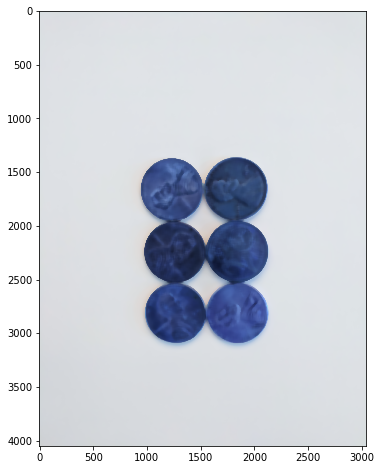

In [115]:
img = cv2.medianBlur(img,35)
display(img)

#### Step 3: Convert to Grayscale

In [116]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#### Step 4: Apply Threshold (Inverse Binary with OTSU as well)

In [117]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

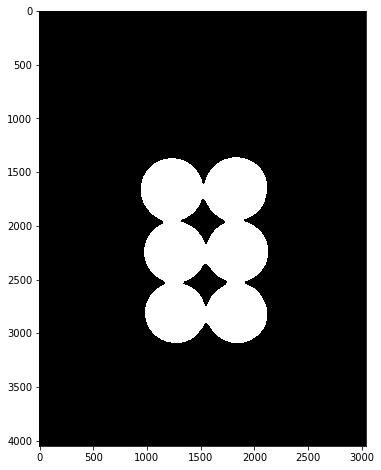

In [118]:
display(thresh,cmap='gray')

#### Optional Step 5: Noise Removal

In [119]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

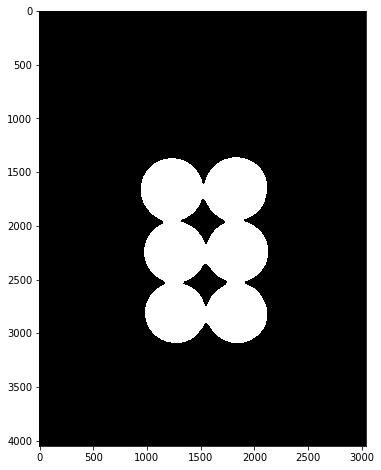

In [120]:
display(opening,cmap='gray')

#### Step 6: Grab Background that you are sure of

In [121]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

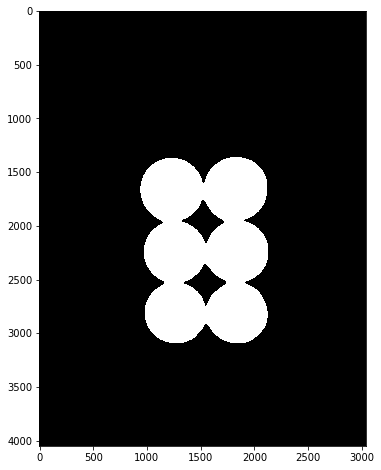

In [122]:
display(sure_bg,cmap='gray')

#### Step 7: Find Sure Foreground

In [123]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

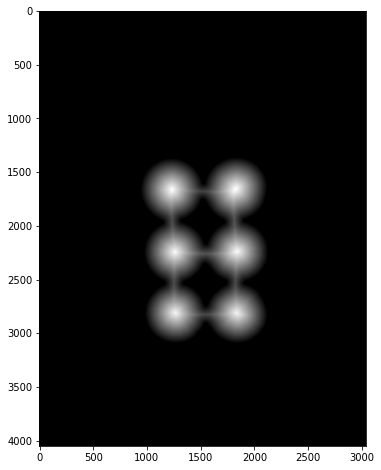

In [124]:
display(dist_transform,cmap='gray')

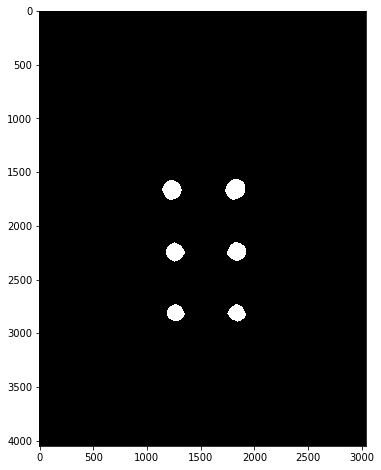

In [125]:
display(sure_fg,cmap='gray')

#### Step 8: Find Unknown Region

In [126]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

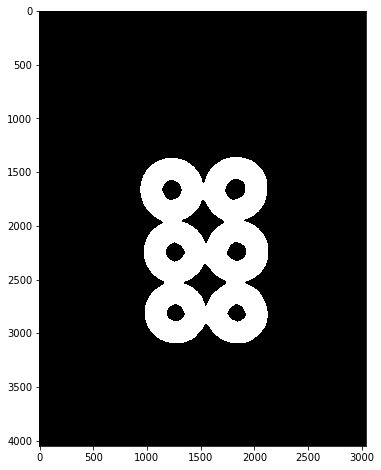

In [127]:
display(unknown,cmap='gray')

#### Step 9: Label Markers of Sure Foreground

In [128]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

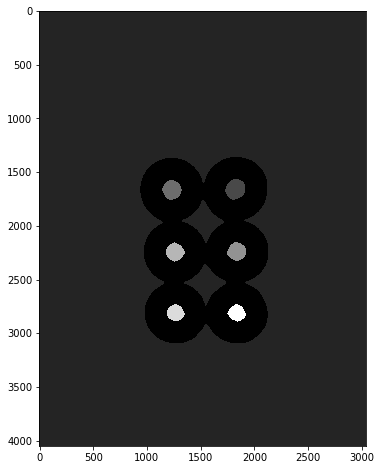

In [129]:
display(markers,cmap='gray')

#### Step 10: Apply Watershed Algorithm to find Markers

In [130]:
markers = cv2.watershed(img,markers)

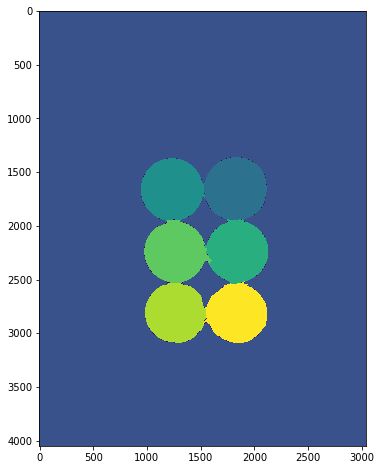

In [131]:
display(markers)

#### Step 11: Find Contours on Markers

In [132]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

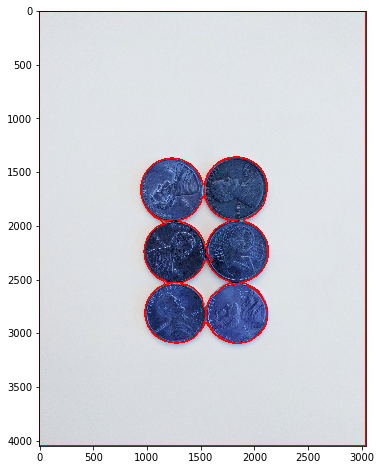

In [133]:
display(sep_coins)

### Custom Seeds with the WaterShed Algorithm

Previously we did a lot of work for OpenCV to set Markers to provide seeds to the Watershed Algorithm. But what if we just provide seeds ourselves? Let's try it out!

#### Imports

In [134]:
import cv2
import numpy as np

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in the Image and Make a Copy

In [136]:
road = cv2.imread('DATA/road_image.jpg')
road_copy = np.copy(road)

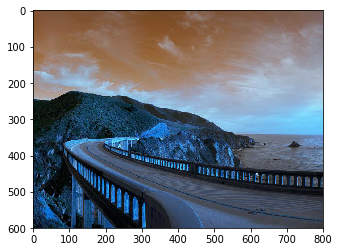

In [137]:
plt.imshow(road)

#### Create an empty space for the results to be drawn

In [138]:
road.shape

(600, 800, 3)

In [139]:
road.shape[:2]

(600, 800)

In [140]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [141]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [142]:
segments.shape

(600, 800, 3)

#### Create colors for Markers

https://matplotlib.org/examples/color/colormaps_reference.html

In [143]:
from matplotlib import cm

Returns (R,G,B,Alpha) we only need RGB values

In [144]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [145]:
cm.tab10(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [146]:
np.array(cm.tab10(0))

array([0.12156863, 0.46666667, 0.70588235, 1.        ])

In [147]:
np.array(cm.tab10(0))[:3]

array([0.12156863, 0.46666667, 0.70588235])

In [148]:
np.array(cm.tab10(0))[:3]*255

array([ 31., 119., 180.])

In [149]:
x = np.array(cm.tab10(0))[:3]*255

In [150]:
x.astype(int)

array([ 31, 119, 180])

In [151]:
tuple(x.astype(int))

(31, 119, 180)

Let's make a function for all those steps

In [152]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [153]:
colors = []

In [154]:
# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

In [155]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

#### Setting Up Callback Function

In [156]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [157]:
# Numbers 0-9
n_markers = 10

In [158]:
########################
### GLOBAL VARIABLES ###
########################

# Default settings
current_marker = 1
marks_updated = False

In [159]:
#####################
# CALLBACK FUNCTION #
#####################

def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [160]:

###############################
### CONNECT TO THE CALLBACK ###
###############################

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # Show the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
        n = int(chr(k))
        if 1 <= n <= n_markers:
            current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            # coloring the ssegments
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

--------------

## Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [161]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

### Images

In [162]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)

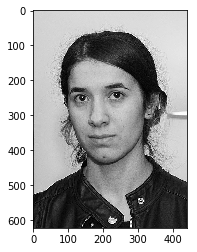

In [163]:
plt.imshow(nadia,cmap='gray')

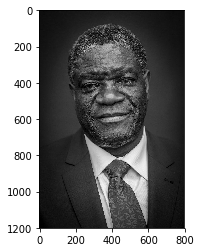

In [164]:
plt.imshow(denis,cmap='gray')

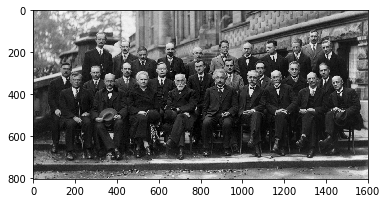

In [165]:
plt.imshow(solvay,cmap='gray')

### Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

### Face Detection

In [166]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [167]:
def detect_face(img):
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [168]:
result = detect_face(denis)

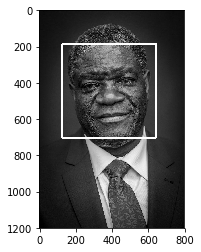

In [169]:
plt.imshow(result,cmap='gray')

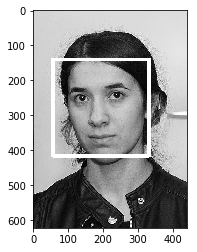

In [170]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

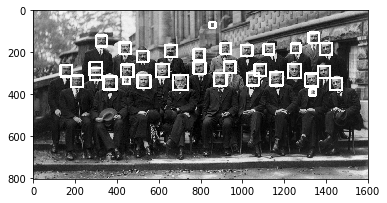

In [171]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [172]:
def adj_detect_face(img):
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

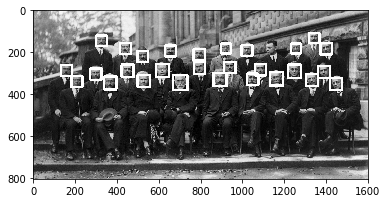

In [173]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

### Eye Cascade File

In [174]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [175]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

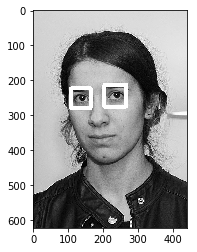

In [176]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

In [177]:
eyes = eye_cascade.detectMultiScale(denis) 

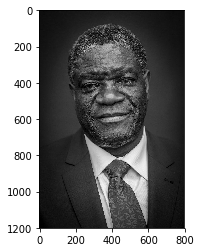

In [178]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

### Conjunction with Video

In [181]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

----------

## Object Detection Assessment Project Exercise

### Russian License Plate Blurring

Welcome to your object detection project! Your goal will be to use Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files (unfortunately, it does not come with license detectors for other countries!)


#### 3 Ways to Approach this project:
* Just go for it! Use the image under the DATA folder called car_plate.jpg and create a function that will blur the image of its license plate. Check out the Haar Cascades folder for the correct pre-trained .xml file to use.
* Use this notebook! Here we offer a guide of what main steps you should take to complete the project.
* Jump to the solutions notebook and video to treat this entire project as code-along project where you can code along with us.

#### Project Guide

Follow and complete the tasks below to finish the project!

**TASK: Import the usual libraries you think you'll need.**

In [182]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**TASK: Read in the car_plate.jpg file from the DATA folder.**

In [183]:
img = cv2.imread('DATA/car_plate.jpg')

**TASK: Create a function that displays the image in a larger scale and correct coloring for matplotlib.**

In [184]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

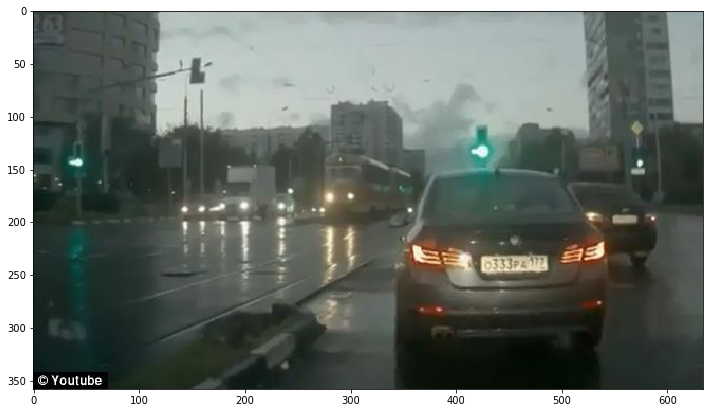

In [185]:
display(img)

**TASK: Load the haarcascade_russian_plate_number.xml file.**

In [186]:
r_plate = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

**TASK: Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur. You may want to play with the scaleFactor and minNeighbor numbers to get good results.**

In [187]:
def detect_plate(plate):
    russian_plate = plate.copy()
  
    plate_rects = r_plate.detectMultiScale(russian_plate,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(russian_plate, (x,y), (x+w,y+h), (0,0,255), 2) 
        
    return russian_plate

In [188]:
result = detect_plate(img)

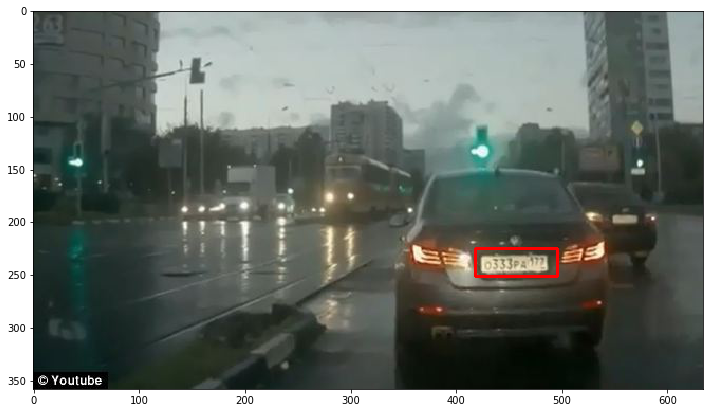

In [189]:
display(result)

**FINAL TASK: Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI (something covered in the lecture 01-Blending-and-Pasting-Images. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [190]:
def detect_and_blur_plate(plate):
    russian_plate = plate.copy()
    roi = plate.copy()
    plate_rects = r_plate.detectMultiScale(russian_plate,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, ksize=9)
        russian_plate[y:y+h, x:x+w] = blurred_roi
        
    return russian_plate
    

In [191]:
result = detect_and_blur_plate(img)

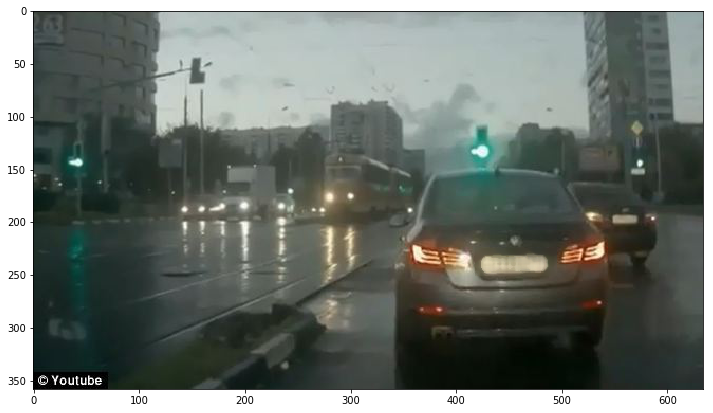

In [192]:
display(result)

----------

In [193]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [194]:

def detect_and_blur_face(img):
    face_img = img.copy()
    roi = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, ksize=15)
        face_img[y:y+h, x:x+w] = blurred_roi
        
    return face_img

In [196]:

## For Blurred Face, but can give an error if the face moves a lot, to be fixed
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_and_blur_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

<img src="Images/front_cam.jpg"/>

--------------
--------------